**Data preparation, saving all comments in one variable.**

In [0]:
import pandas as pd
import numpy as np


In [0]:
data1= pd.read_excel("/content/Project_Water_dispenser_Amazon_RawData.xlsx")
data1
data2=data1.Review_Text
m=0
a=""
for i in data2:
  
  a= a+" "+str(i) 
print(a)


 Everybody that comes to my house comments on how refreshingly cool the water is from this cooler..  Very nice looking. Also very quiet. It worked just fine the first day but stopped working the next. After checking that it was filling with water ect.. we still could not get it to work right sometimes you got water others times it would not . We had to return it. Since it was a gift we ended up replaceing it with one from a store near by. The unit works well.  I read the hot cold units leaked and did not want one.  Hard to find this type of unit.  Cold only.  It works well; better than my last which had an attachment to add to the bottle before you turned it upside down.  This is easy to clean and has no attachment.  The price however was double what I paid for my last one at Costco.  Hard to find cold only units.  I have no hesitation in recommending this if you can afford it. Works Great! Works without power. Works like a charm easy to set up and to use took it to camp. works very we

In [0]:
text=a.lower()

**Importing NLTK Libraries**

In [0]:

import nltk # for pre-processing text
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob # for sentiment analysis

import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

**Tokenizing Sentences, THIS CAN BE SKIPPED**

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
tokenized_text=sent_tokenize(text)

In [0]:
print(tokenized_text)

[' everybody that comes to my house comments on how refreshingly cool the water is from this cooler..  very nice looking.', 'also very quiet.', 'it worked just fine the first day but stopped working the next.', 'after checking that it was filling with water ect.. we still could not get it to work right sometimes you got water others times it would not .', 'we had to return it.', 'since it was a gift we ended up replaceing it with one from a store near by.', 'the unit works well.', 'i read the hot cold units leaked and did not want one.', 'hard to find this type of unit.', 'cold only.', 'it works well; better than my last which had an attachment to add to the bottle before you turned it upside down.', 'this is easy to clean and has no attachment.', 'the price however was double what i paid for my last one at costco.', 'hard to find cold only units.', 'i have no hesitation in recommending this if you can afford it.', 'works great!', 'works without power.', 'works like a charm easy to set

**Word Tokenizer to break each words**

In [0]:
tokenized_word=word_tokenize(text)

In [0]:
print(tokenized_word)

['everybody', 'that', 'comes', 'to', 'my', 'house', 'comments', 'on', 'how', 'refreshingly', 'cool', 'the', 'water', 'is', 'from', 'this', 'cooler..', 'very', 'nice', 'looking', '.', 'also', 'very', 'quiet', '.', 'it', 'worked', 'just', 'fine', 'the', 'first', 'day', 'but', 'stopped', 'working', 'the', 'next', '.', 'after', 'checking', 'that', 'it', 'was', 'filling', 'with', 'water', 'ect..', 'we', 'still', 'could', 'not', 'get', 'it', 'to', 'work', 'right', 'sometimes', 'you', 'got', 'water', 'others', 'times', 'it', 'would', 'not', '.', 'we', 'had', 'to', 'return', 'it', '.', 'since', 'it', 'was', 'a', 'gift', 'we', 'ended', 'up', 'replaceing', 'it', 'with', 'one', 'from', 'a', 'store', 'near', 'by', '.', 'the', 'unit', 'works', 'well', '.', 'i', 'read', 'the', 'hot', 'cold', 'units', 'leaked', 'and', 'did', 'not', 'want', 'one', '.', 'hard', 'to', 'find', 'this', 'type', 'of', 'unit', '.', 'cold', 'only', '.', 'it', 'works', 'well', ';', 'better', 'than', 'my', 'last', 'which', 'had

**Plooting Frequency of Words, plotting 30 high freq words**

In [0]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 8759 samples and 236518 outcomes>


In [0]:
fdist.most_common(20)

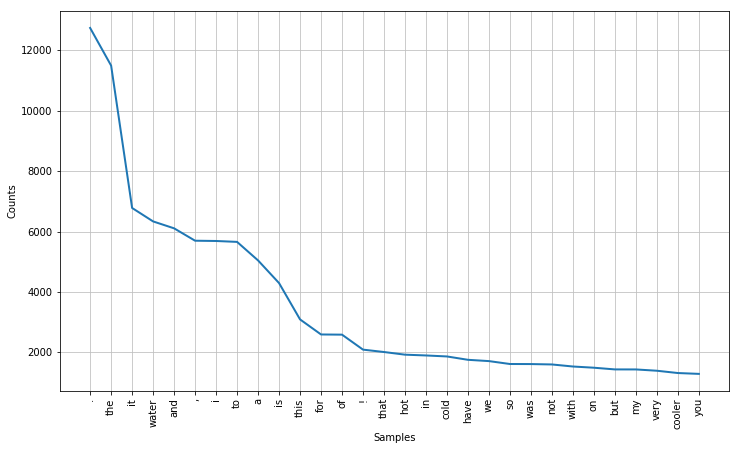

In [0]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Removing Stopwords**

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words=set(stopwords.words("english"))

In [0]:
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)

In [0]:
print("Filterd Words:",filtered_word[:100])

Filterd Words: ['everybody', 'comes', 'house', 'comments', 'refreshingly', 'cool', 'water', 'cooler..', 'nice', 'looking', '.', 'also', 'quiet', '.', 'worked', 'fine', 'first', 'day', 'stopped', 'working', 'next', '.', 'checking', 'filling', 'water', 'ect..', 'still', 'could', 'get', 'work', 'right', 'sometimes', 'got', 'water', 'others', 'times', 'would', '.', 'return', '.', 'since', 'gift', 'ended', 'replaceing', 'one', 'store', 'near', '.', 'unit', 'works', 'well', '.', 'read', 'hot', 'cold', 'units', 'leaked', 'want', 'one', '.', 'hard', 'find', 'type', 'unit', '.', 'cold', '.', 'works', 'well', ';', 'better', 'last', 'attachment', 'add', 'bottle', 'turned', 'upside', '.', 'easy', 'clean', 'attachment', '.', 'price', 'however', 'double', 'paid', 'last', 'one', 'costco', '.', 'hard', 'find', 'cold', 'units', '.', 'hesitation', 'recommending', 'afford', '.', 'works']


In [0]:
fdist = FreqDist(filtered_word)

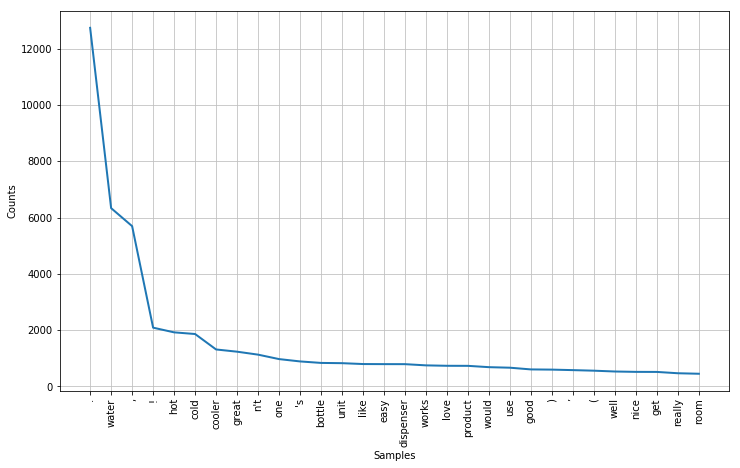

In [0]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Removing Punctuations**

In [0]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in filtered_word]

**Removing Non-Alphabetic Tokens**

In [0]:
filtered_words = [word for word in stripped if word.isalpha()]

**Plotting Filtered Words**

In [0]:
fdist = FreqDist(filtered_words)


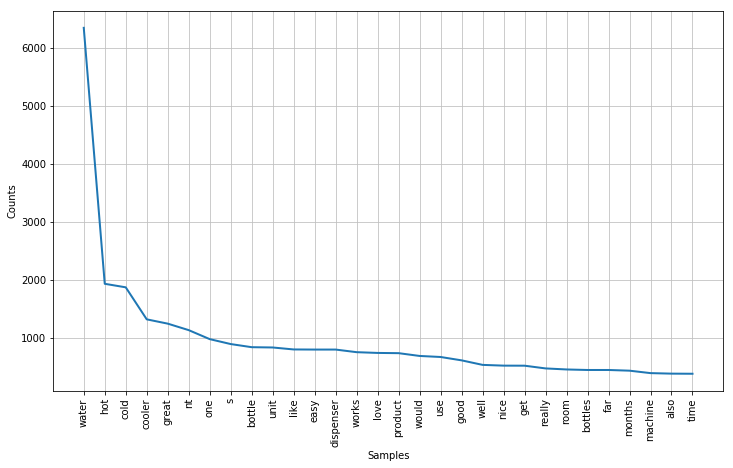

In [0]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Lexicon Normalization, Stemming and Lemmatization**

In [0]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

In [0]:
print("Stemmed Words:",stemmed_words[:100])

Stemmed Words: ['everybodi', 'come', 'hous', 'comment', 'refreshingli', 'cool', 'water', 'cooler', 'nice', 'look', 'also', 'quiet', 'work', 'fine', 'first', 'day', 'stop', 'work', 'next', 'check', 'fill', 'water', 'ect', 'still', 'could', 'get', 'work', 'right', 'sometim', 'got', 'water', 'other', 'time', 'would', 'return', 'sinc', 'gift', 'end', 'replac', 'one', 'store', 'near', 'unit', 'work', 'well', 'read', 'hot', 'cold', 'unit', 'leak', 'want', 'one', 'hard', 'find', 'type', 'unit', 'cold', 'work', 'well', 'better', 'last', 'attach', 'add', 'bottl', 'turn', 'upsid', 'easi', 'clean', 'attach', 'price', 'howev', 'doubl', 'paid', 'last', 'one', 'costco', 'hard', 'find', 'cold', 'unit', 'hesit', 'recommend', 'afford', 'work', 'great', 'work', 'without', 'power', 'work', 'like', 'charm', 'easi', 'set', 'use', 'took', 'camp', 'work', 'well', 'great', 'juic']


**Trying Lemmatization**

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_words:
    lemma_words.append(lem.lemmatize(w))

In [0]:
print("Lemmatize Words:",lemma_words[:100])

Lemmatize Words: ['everybody', 'come', 'house', 'comment', 'refreshingly', 'cool', 'water', 'cooler', 'nice', 'looking', 'also', 'quiet', 'worked', 'fine', 'first', 'day', 'stopped', 'working', 'next', 'checking', 'filling', 'water', 'ect', 'still', 'could', 'get', 'work', 'right', 'sometimes', 'got', 'water', 'others', 'time', 'would', 'return', 'since', 'gift', 'ended', 'replaceing', 'one', 'store', 'near', 'unit', 'work', 'well', 'read', 'hot', 'cold', 'unit', 'leaked', 'want', 'one', 'hard', 'find', 'type', 'unit', 'cold', 'work', 'well', 'better', 'last', 'attachment', 'add', 'bottle', 'turned', 'upside', 'easy', 'clean', 'attachment', 'price', 'however', 'double', 'paid', 'last', 'one', 'costco', 'hard', 'find', 'cold', 'unit', 'hesitation', 'recommending', 'afford', 'work', 'great', 'work', 'without', 'power', 'work', 'like', 'charm', 'easy', 'set', 'use', 'took', 'camp', 'work', 'well', 'great', 'juice']


**Word Count**

In [0]:
print('Total number of words after text pre-processing :', len(lemma_words))

Total number of words after text pre-processing : 106447


**Word Cloud**

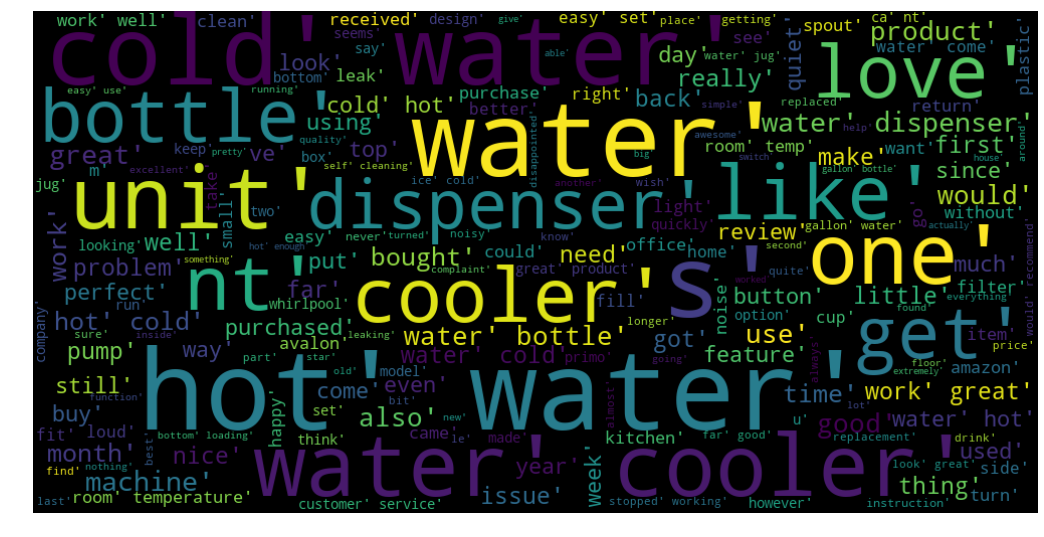

In [0]:
filtered_speech_words = str(lemma_words)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Getting only Unique Words**

In [0]:
speech_word_counts = Counter(lemma_words)

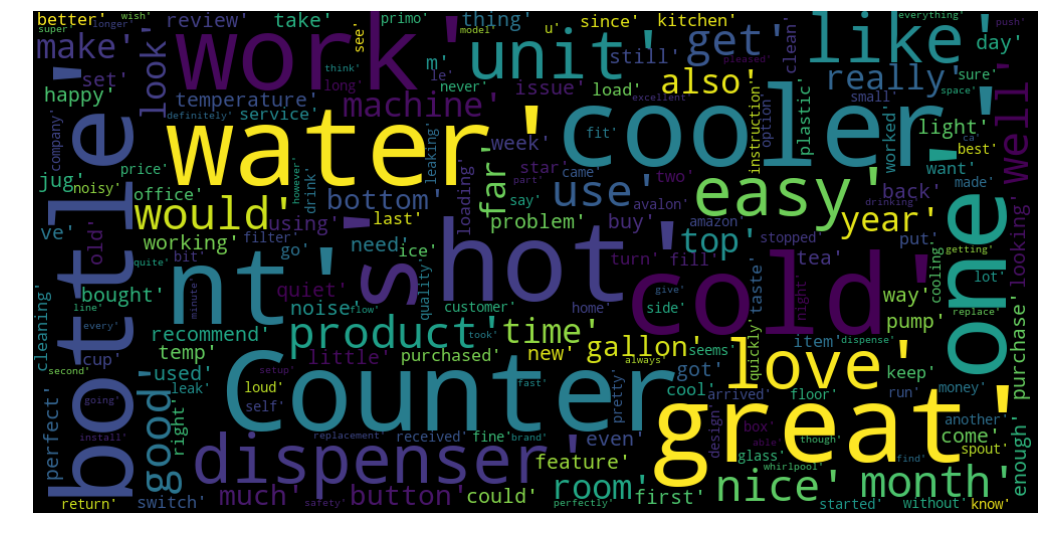

In [0]:
filtered_speech_words = str(speech_word_counts)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Plotting 20 most top words**

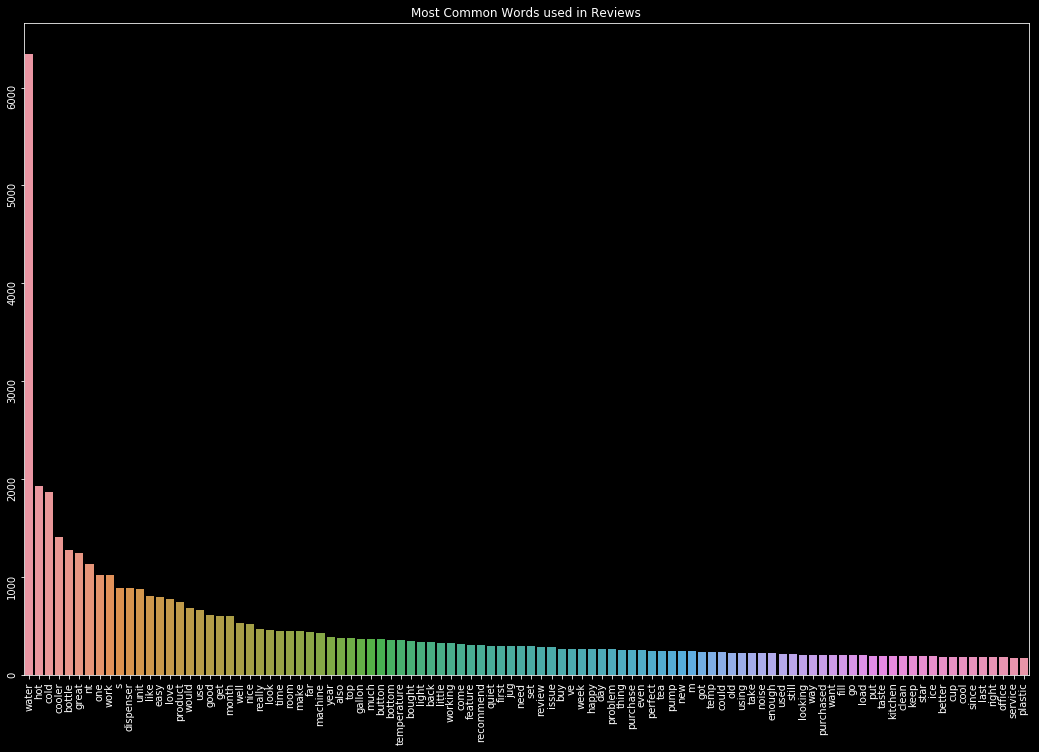

In [0]:
rr_common_words = [word[0] for word in speech_word_counts.most_common(100)]
rr_common_counts = [word[1] for word in speech_word_counts.most_common(100)]

# Using background style
plt.style.use('dark_background')
plt.figure(figsize=(18, 12))

sns.barplot(x=rr_common_words, y=rr_common_counts)
plt.title('Most Common Words used in Reviews')
plt.tick_params(axis ='x', rotation = 90)
plt.tick_params(axis ='y', rotation = 90)
plt.show()

**Sentiments Using TextBlob**

In [0]:
speech_text_object = TextBlob(filtered_speech_words)

In [0]:
speech_text_object.sentiment

Sentiment(polarity=0.2138165556427359, subjectivity=0.7143193916241124)

**Plotting words by their sentiments.**

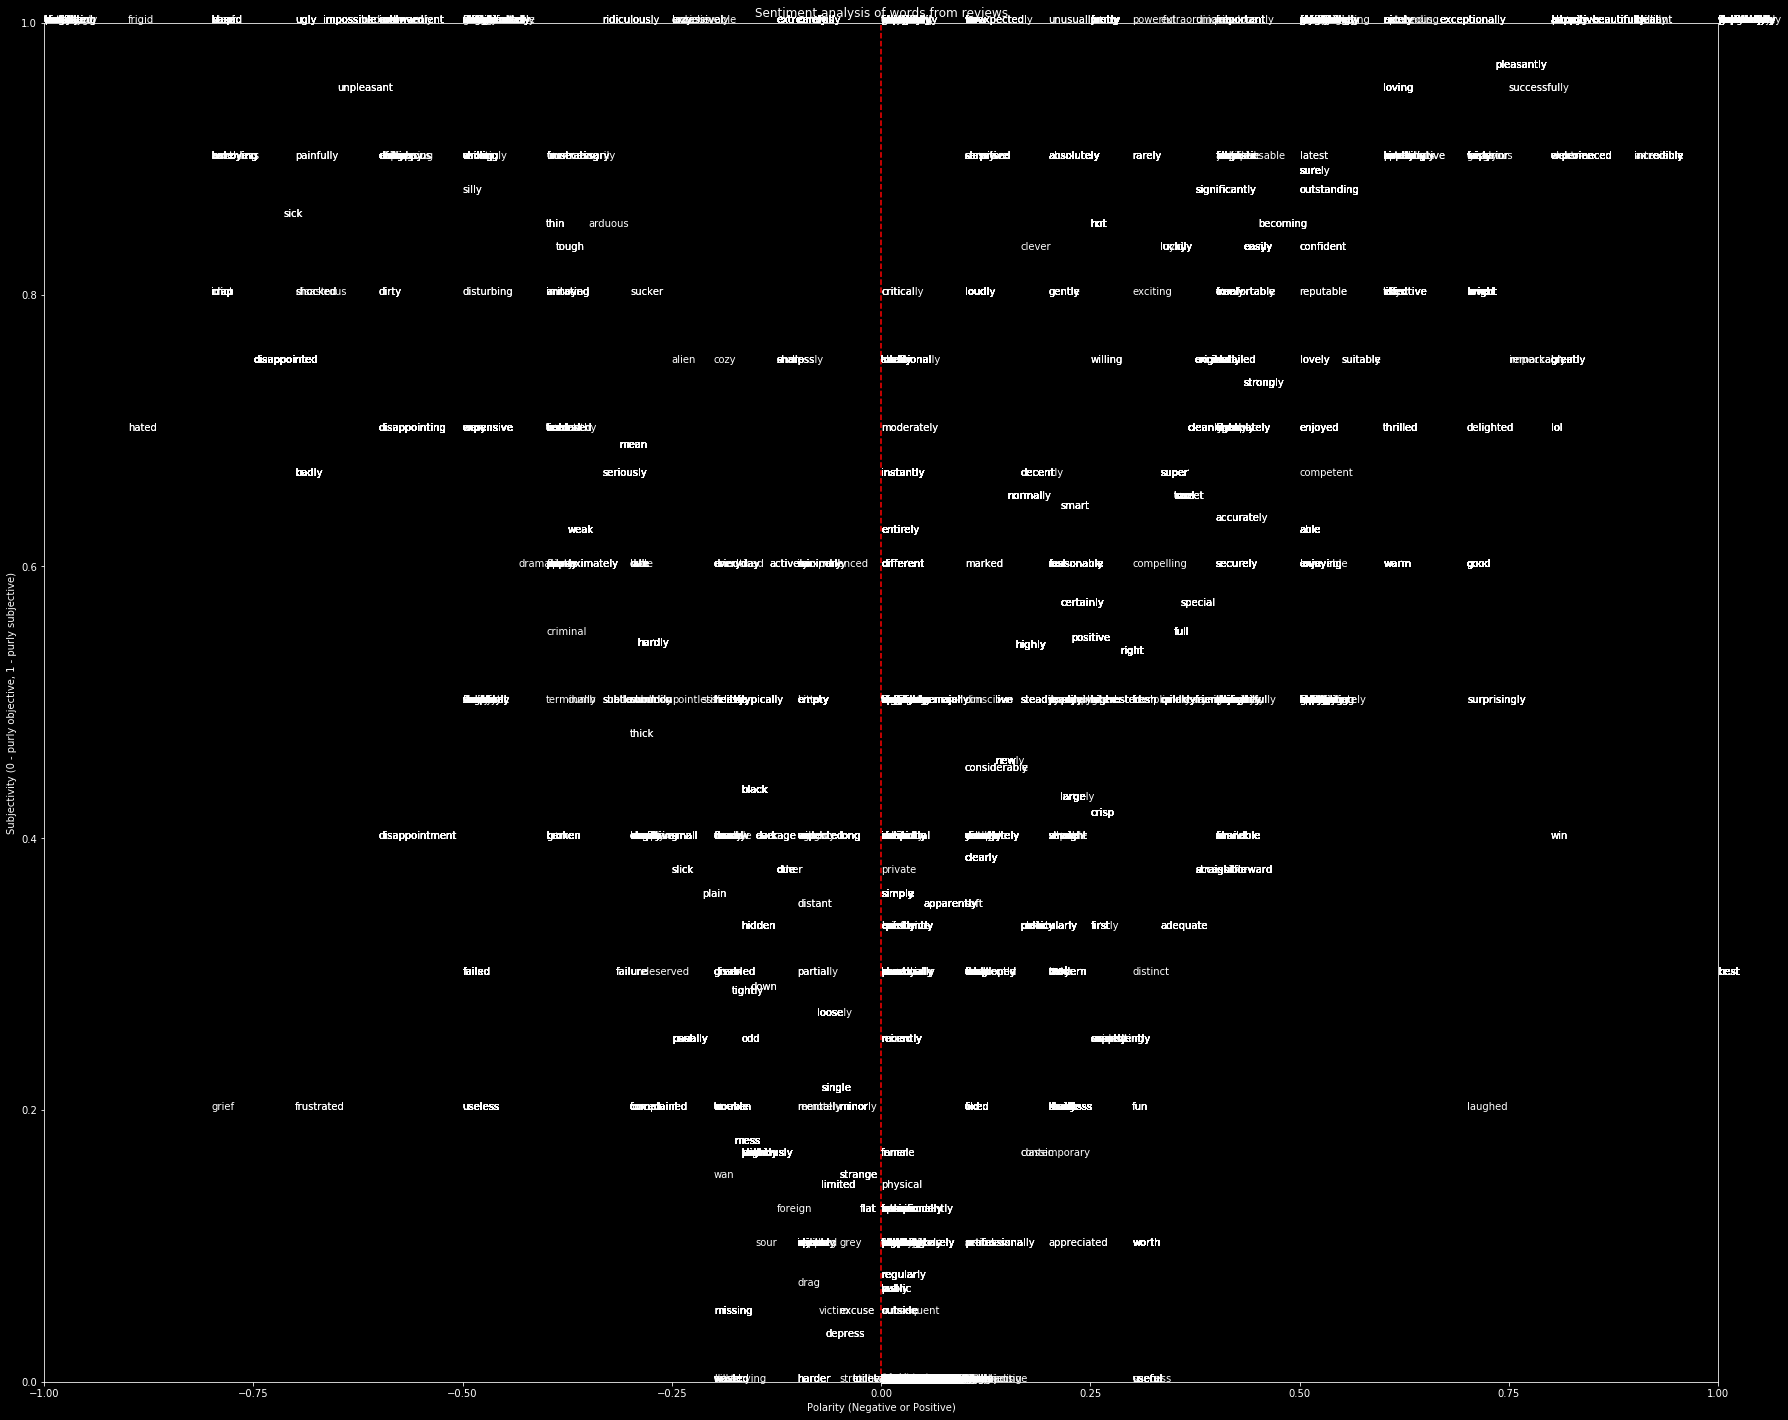

In [0]:
plt.figure(figsize=(30,25))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in lemma_words:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from reviews')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

**Plotting Bigrams**

In [0]:
from nltk.util import ngrams

In [0]:
print(text)

 everybody that comes to my house comments on how refreshingly cool the water is from this cooler..  very nice looking. also very quiet. it worked just fine the first day but stopped working the next. after checking that it was filling with water ect.. we still could not get it to work right sometimes you got water others times it would not . we had to return it. since it was a gift we ended up replaceing it with one from a store near by. the unit works well.  i read the hot cold units leaked and did not want one.  hard to find this type of unit.  cold only.  it works well; better than my last which had an attachment to add to the bottle before you turned it upside down.  this is easy to clean and has no attachment.  the price however was double what i paid for my last one at costco.  hard to find cold only units.  i have no hesitation in recommending this if you can afford it. works great! works without power. works like a charm easy to set up and to use took it to camp. works very we

In [0]:
import itertools

In [0]:
def ngrams_wrapper(sent):
    return list(nltk.ngrams(sent, 2))

In [0]:
sentences = nltk.sent_tokenize(text)

In [0]:
tokenized = map(nltk.tokenize.word_tokenize, sentences)

In [0]:
bigrams = map(ngrams_wrapper, tokenized)

In [0]:
print(bigrams)

In [0]:
bigram = list(itertools.chain.from_iterable(bigrams))

In [0]:
freq_dist = nltk.FreqDist(bigram)

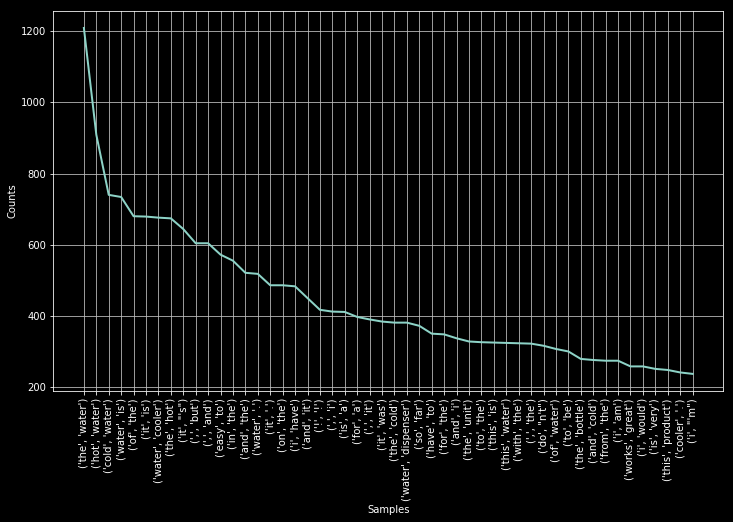

In [0]:
plt.figure(figsize=(12, 7))
freq_dist.plot(50,cumulative=False)
plt.show()

In [0]:
bigrams_7 = map(ngrams_wrapper_2, tokenized)

In [0]:
bigram_7 = list(itertools.chain.from_iterable(bigrams_7))

In [0]:
freq_dist_7 = nltk.FreqDist(bigram_7)

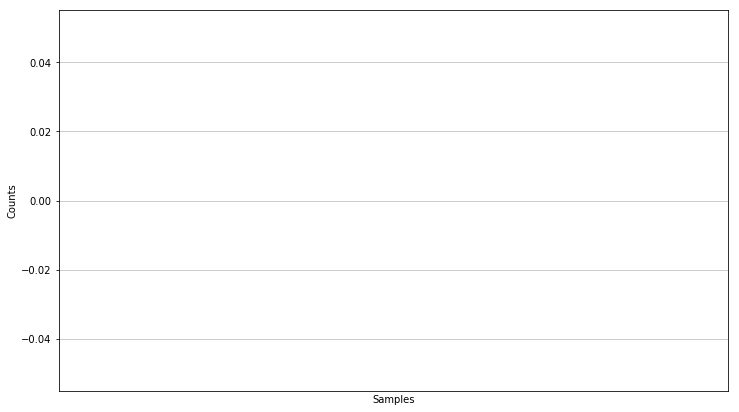

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_7.plot(50,cumulative=False)
plt.show()

In [0]:
prob_dist = nltk.MLEProbDist(freq_dist)

**Bigrams on Lemma Words**

In [0]:
bigrams_2 = map(ngrams_wrapper, lemma_words)

In [0]:
print(lemma_words)

['Everybody', 'come', 'house', 'comment', 'refreshingly', 'cool', 'water', 'cooler', 'Very', 'nice', 'looking', 'Also', 'quiet', 'It', 'worked', 'fine', 'first', 'day', 'stopped', 'working', 'next', 'After', 'checking', 'filling', 'water', 'ect', 'still', 'could', 'get', 'work', 'right', 'sometimes', 'got', 'water', 'others', 'time', 'would', 'We', 'return', 'Since', 'gift', 'ended', 'replaceing', 'one', 'store', 'near', 'The', 'unit', 'work', 'well', 'I', 'read', 'hot', 'cold', 'unit', 'leaked', 'want', 'one', 'Hard', 'find', 'type', 'unit', 'Cold', 'It', 'work', 'well', 'better', 'last', 'attachment', 'add', 'bottle', 'turned', 'upside', 'This', 'easy', 'clean', 'attachment', 'The', 'price', 'however', 'double', 'I', 'paid', 'last', 'one', 'Costco', 'Hard', 'find', 'cold', 'unit', 'I', 'hesitation', 'recommending', 'afford', 'Works', 'Great', 'Works', 'without', 'power', 'Works', 'like', 'charm', 'easy', 'set', 'use', 'took', 'camp', 'work', 'well', 'Great', 'Juice', 'way', 'get', 'w

In [0]:
bigram_2 = list(itertools.chain.from_iterable(bigrams_2))

In [0]:
freq_dist_2 = nltk.FreqDist(bigram_2)

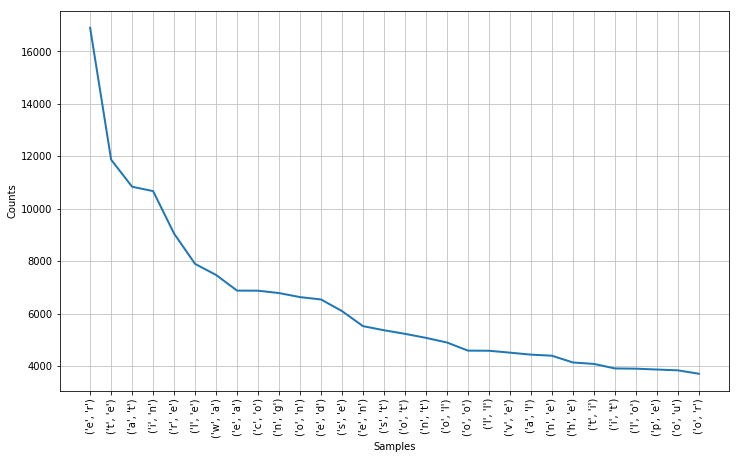

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_2.plot(30,cumulative=False)
plt.show()

**Bigrams on Stemmed words**

In [0]:
def ngrams_wrapper_2(sent):
    return list(nltk.ngrams(sent, 5))

In [0]:
bigrams_3 = map(ngrams_wrapper_2, stemmed_words)

In [0]:
bigram_3 = list(itertools.chain.from_iterable(bigrams_3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [0]:
freq_dist_3 = nltk.FreqDist(bigram_3)

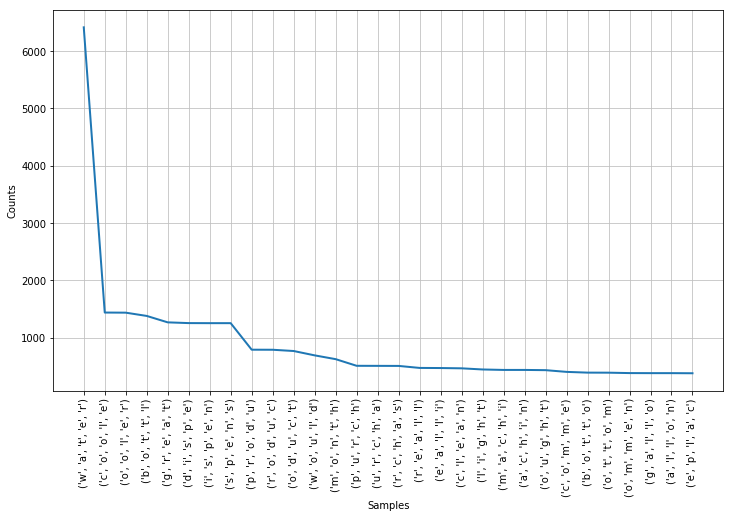

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_3.plot(30,cumulative=False)
plt.show()

In [0]:
https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a
https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184

**Bigram on Filtered words, removing punctuation**

In [0]:
filtered_words

In [0]:
bigrams_100 = map(ngrams_wrapper, filtered_words)

In [0]:
bigram_100 = list(itertools.chain.from_iterable(bigrams_100))

In [0]:
freq_dist_100 = nltk.FreqDist(bigram_100)

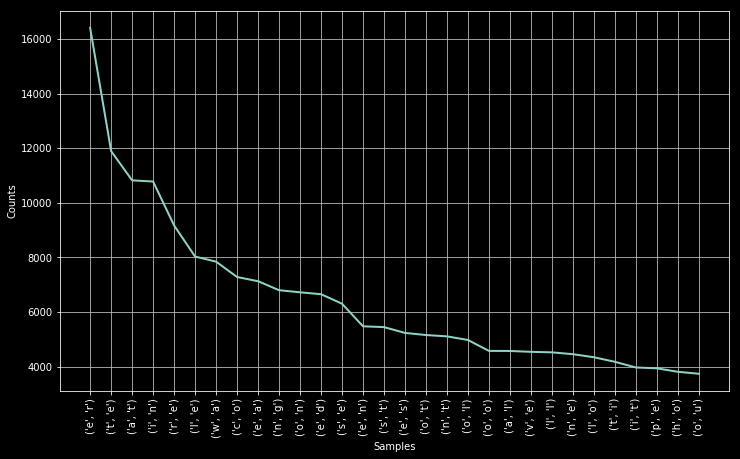

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_100.plot(30,cumulative=False)
plt.show()

**Polarity for each comment**

In [0]:
data5=data1.Review_Text

In [0]:
list5=[]
a=""
for w in data5:
  a=str(w).lower()
  list5.append(a)




In [0]:
print(list5[0])

everybody that comes to my house comments on how refreshingly cool the water is from this cooler..  very nice looking. also very quiet.


In [0]:
len(list5)

4157

In [0]:
data1.shape

(4157, 32)

In [0]:
senti=[]
for i in list5:
  speech_text_object_2 = TextBlob(str(i))
  senti.append(speech_text_object_2.sentiment.polarity)
print(senti)
  

[0.37666666666666665, 0.21047619047619048, -0.06592592592592593, 1.0, 0.0, 0.43333333333333335, 0.25, 0.8, 0.425, 0.53125, 0.17222222222222222, 0.8, 0.19563908313908313, 0.3356060606060606, 0.08626851851851852, 0.7569444444444445, 0.3666666666666667, 0.4802083333333333, 0.22805555555555554, 0.325, 0.2, 0.6333333333333334, 0.825, 0.09360119047619046, -0.23617283950617285, 0.2583333333333333, -0.06363636363636364, 0.1857142857142857, 0.3207575757575758, 0.3866666666666667, -0.03656462585034016, 0.3464285714285714, -0.08333333333333333, -0.11666666666666665, 0.1301851851851852, -0.14166666666666666, 0.5, 0.35714285714285715, 0.6, 0.19107142857142856, 0.34722222222222215, 0.6, 0.8, 0.10416666666666667, 0.39999999999999997, 0.8, 0.2833333333333333, -0.16666666666666666, 0.5, -0.05000000000000002, 0.14666666666666667, 0.22444444444444445, 0.13174603174603178, 0.07974537037037036, 0.0, 1.0, 0.43333333333333335, 0.9099999999999999, 0.8, 0.7708333333333334, 0.25, 0.20833333333333334, -0.1875, 0

In [0]:
len(senti)

4157

In [0]:
bond=data1

In [0]:
bond.head(2)

ugam_id  ...  Polarity
0       40  ...  0.376667
1       40  ...  0.210476

[2 rows x 33 columns]

In [0]:
bond["Polarity"]=senti

In [0]:
bond.tail(2)

ugam_id  ...  Polarity
4155        5  ...  0.000000
4156        5  ...  0.187826

[2 rows x 33 columns]

In [0]:
bond.to_excel('varad_1.xlsx')

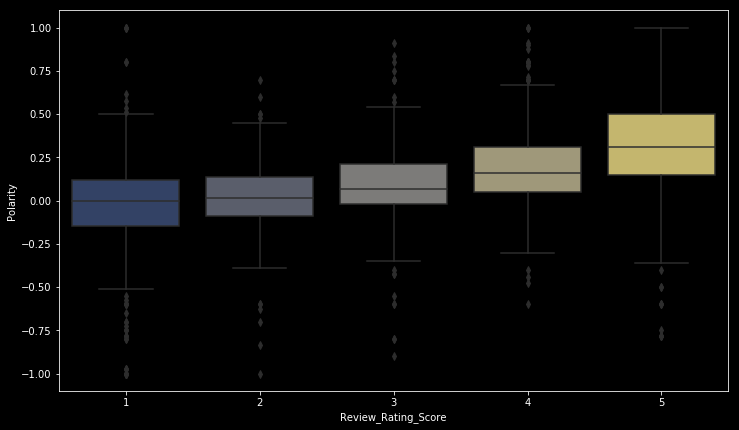

In [0]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Polarity',data=bond,palette='cividis',color='white')

In [0]:
bond.shape

(4157, 33)

In [0]:
sub=[]
for i in list5:
  speech_text_object_3 = TextBlob(str(i))
  sub.append(speech_text_object_3.sentiment.subjectivity)
print(sub)
  

[0.6944444444444443, 0.3538095238095238, 0.625925925925926, 0.75, 0.0, 0.8333333333333334, 0.3, 0.75, 0.575, 0.6, 0.6155555555555555, 0.75, 0.45633255633255626, 0.5537878787878788, 0.4546243386243386, 0.7999999999999999, 0.4666666666666666, 0.6020833333333333, 0.5256944444444445, 0.525, 0.2833333333333333, 0.75, 0.875, 0.4086309523809523, 0.5539506172839506, 0.6666666666666667, 0.5333333333333333, 0.6714285714285714, 0.4675757575757576, 0.48666666666666664, 0.5110544217687075, 0.7089285714285714, 0.2111111111111111, 0.5166666666666666, 0.4964814814814815, 0.465, 0.575, 0.4285714285714285, 0.55, 0.48392857142857143, 0.5888888888888889, 0.6000000000000001, 0.75, 0.75, 0.43333333333333335, 0.75, 0.3666666666666667, 0.06666666666666667, 0.5, 0.3, 0.4166666666666667, 0.44222222222222224, 0.4928571428571429, 0.41851851851851846, 0.0, 1.0, 0.45, 0.7800000000000001, 0.75, 0.7916666666666667, 0.4166666666666667, 0.5, 0.5, 0.0, 0.5886363636363636, 0.75, 0.625, 0.6000000000000001, 1.0, 0.5, 0.416

In [0]:
bond["Subjectivity"]=sub

In [0]:
bond.head(2)

ugam_id  ... Subjectivity
0       40  ...     0.694444
1       40  ...     0.353810

[2 rows x 34 columns]

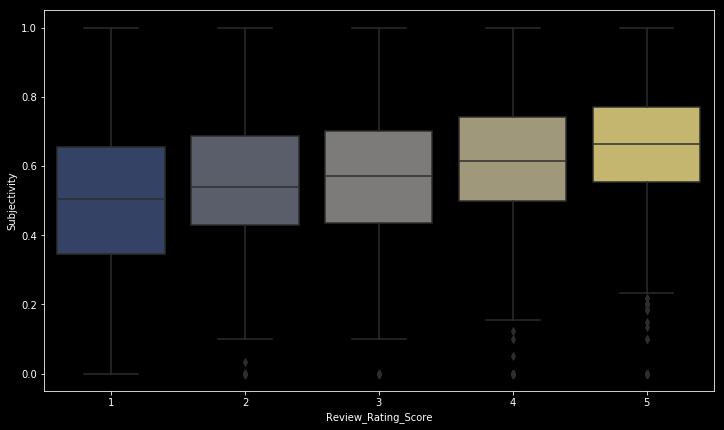

In [0]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Subjectivity',data=bond,palette='cividis',color='white')

**Polarity of Unique Words, use this**

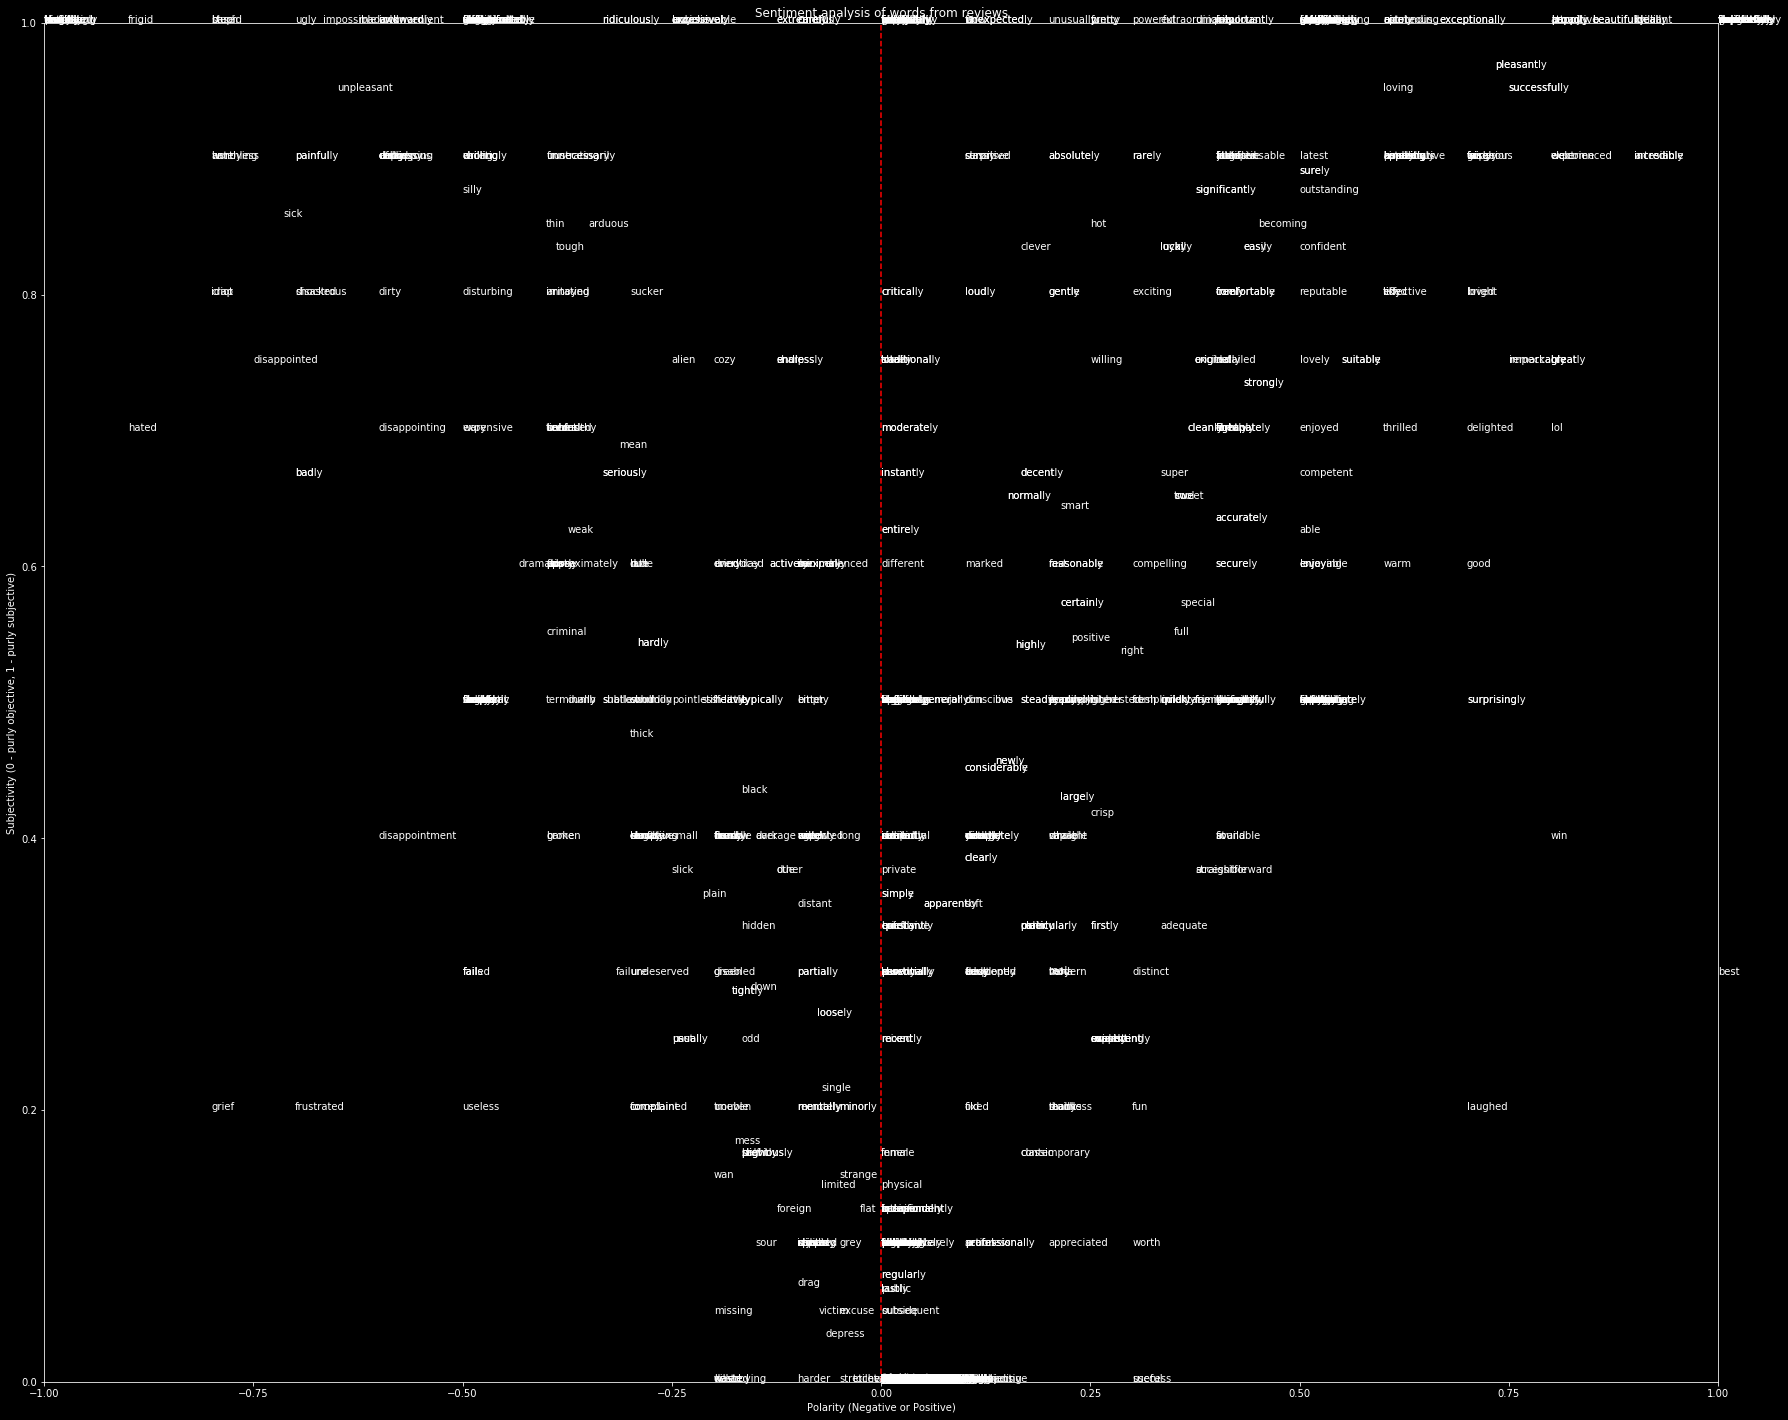

In [0]:
plt.figure(figsize=(30,25))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in speech_word_counts:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from reviews')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

In [0]:
bond.to_excel('varad_c1.xlsx')

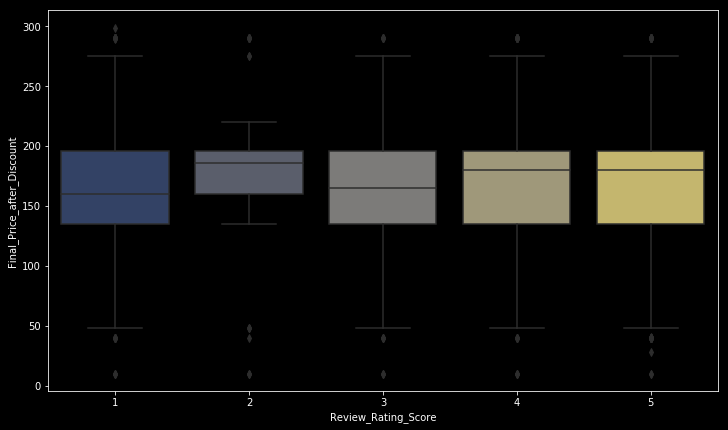

In [0]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Final_Price_after_Discount',data=bond,palette='cividis',color='white')

**Trying NER, not possible due to large number of Characters**

In [0]:
import spacy

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
doc = nlp(text)